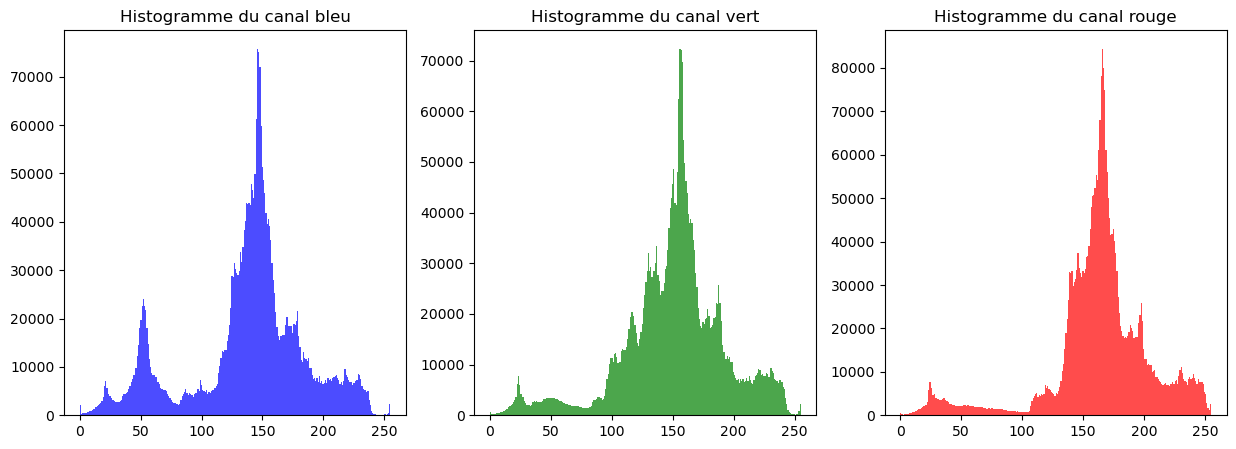

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Charger l'image
image_path = "C:/Users/amirb/OneDrive/Bureau/image.jpg"
image = cv2.imread(image_path)

# Diviser l'image en canaux RGB
blue_channel = image[:, :, 0]
green_channel = image[:, :, 1]
red_channel = image[:, :, 2]

# Tracer les histogrammes
plt.figure(figsize=(15, 5))

# Histogramme du canal bleu
plt.subplot(131)
plt.hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Histogramme du canal bleu')

# Histogramme du canal vert
plt.subplot(132)
plt.hist(green_channel.ravel(), bins=256, color='green', alpha=0.7)
plt.title('Histogramme du canal vert')

# Histogramme du canal rouge
plt.subplot(133)
plt.hist(red_channel.ravel(), bins=256, color='red', alpha=0.7)
plt.title('Histogramme du canal rouge')

plt.show()


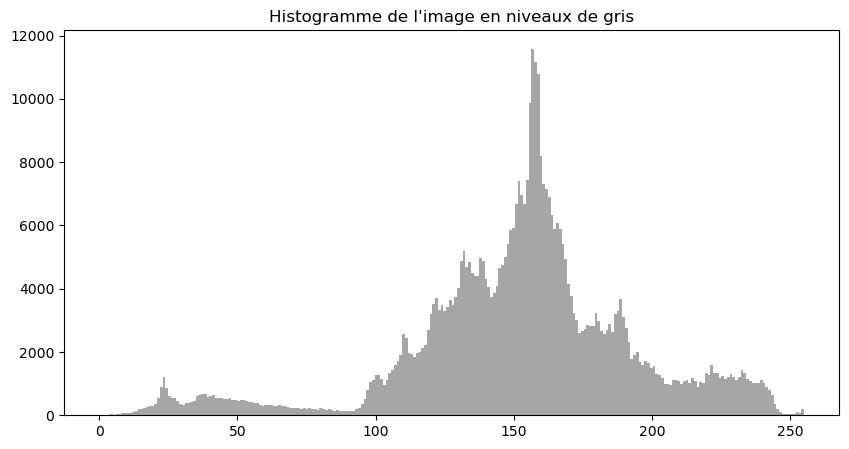

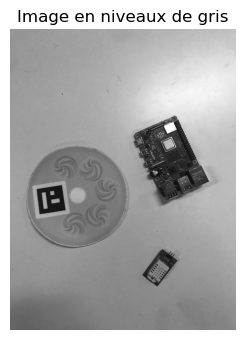

In [26]:
import cv2
import matplotlib.pyplot as plt

# Charger l'image
image_path = "C:/Users/amirb/OneDrive/Bureau/image.jpg"
image = cv2.imread(image_path)

# Convertir en niveaux de gris en utilisant des transformations linéaires
gray_image = 0.299 * image[:, :, 2] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 0]
gray_image = gray_image.astype(np.uint8)

# Redimensionner l'image pour l'affichage
resized_image = cv2.resize(gray_image, (800, 600))  # Ajustez la taille selon vos besoins

# Enregistrer le résultat dans une nouvelle image
cv2.imwrite("C:/Users/amirb/OneDrive/Bureau/image1.jpg", gray_image)

# Tracer l'histogramme de l'image en niveaux de gris
plt.figure(figsize=(10, 5))
plt.hist(resized_image.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histogramme de l\'image en niveaux de gris')
plt.show()


# Afficher l'image en niveaux de gris
plt.subplot(122)
plt.imshow(gray_image, cmap='gray')
plt.title('Image en niveaux de gris')
plt.axis('off') 
cv2.waitKey(0)
cv2.destroyAllWindows()


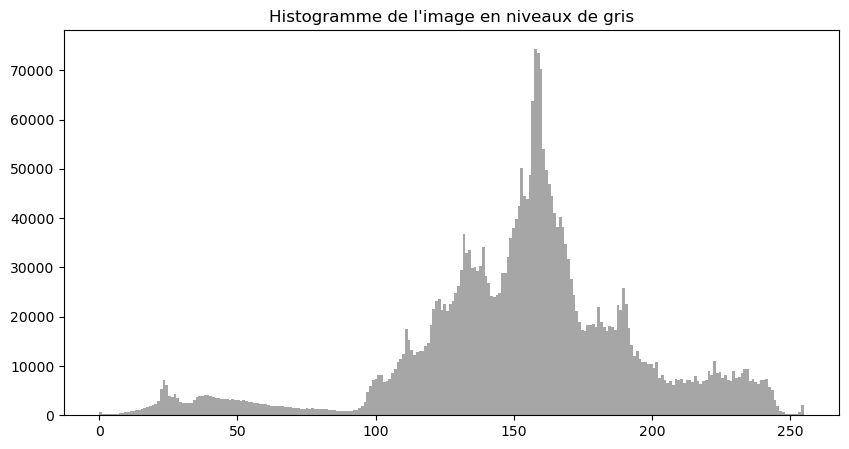

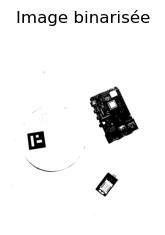

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
gray_image = cv2.imread("C:/Users/amirb/OneDrive/Bureau/image.jpg", cv2.IMREAD_GRAYSCALE)

# Tracer l'histogramme de l'image en niveaux de gris
plt.figure(figsize=(10, 5))
plt.hist(gray_image.ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Histogramme de l\'image en niveaux de gris')
plt.show()

# Choisir le seuil en fonction de l'histogramme (exemple: seuil à 128)
seuil = 90

# Binariser l'image en fonction du seuil
_, binary_image = cv2.threshold(gray_image, seuil, 255, cv2.THRESH_BINARY)

# Enregistrer le résultat dans une nouvelle image
cv2.imwrite("C:/Users/amirb/OneDrive/Bureau/image2.jpg", binary_image)

# Afficher l'image originale et l'image binarisée
plt.subplot(132)
plt.imshow(binary_image, cmap='gray')
plt.title('Image binarisée')
plt.axis('off')
cv2.waitKey(0)
cv2.destroyAllWindows()




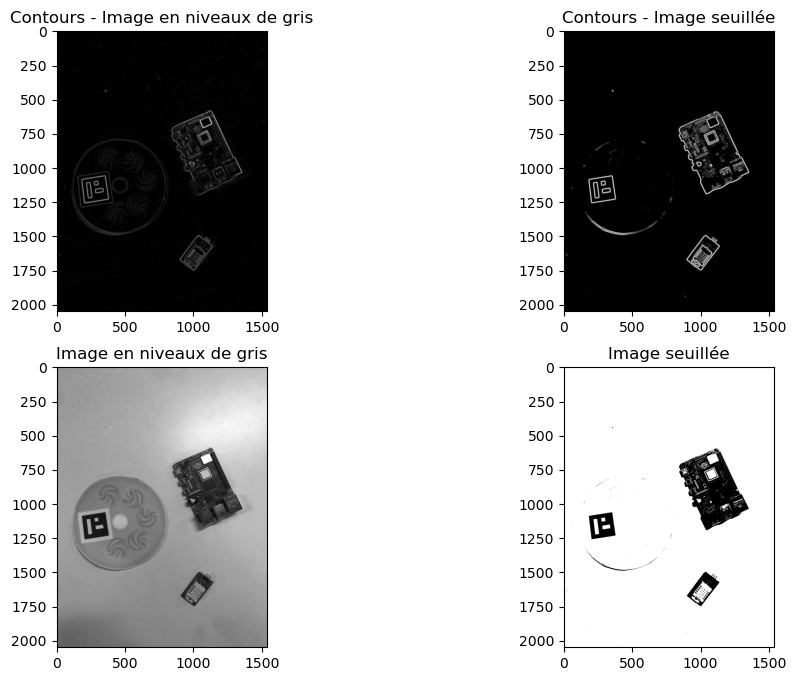

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
gray_image = cv2.imread("C:/Users/amirb/OneDrive/Bureau/image1.jpg", cv2.IMREAD_GRAYSCALE)

# Charger l'image binarisée
binary_image = cv2.imread("C:/Users/amirb/OneDrive/Bureau/image2.jpg", cv2.IMREAD_GRAYSCALE)

# Appliquer le filtre de Sobel sur l'image en niveaux de gris
sobelx_gray = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=31)
sobely_gray = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=31)

# Appliquer le filtre de Sobel sur l'image seuillée
sobelx_binary = cv2.Sobel(binary_image, cv2.CV_64F, 1, 0, ksize=31)
sobely_binary = cv2.Sobel(binary_image, cv2.CV_64F, 0, 1, ksize=31)

# Calculer le gradient total (magnitude) et l'angle pour les images en niveaux de gris
gradient_magnitude_gray = np.sqrt(sobelx_gray**2 + sobely_gray**2)
gradient_angle_gray = np.arctan2(sobely_gray, sobelx_gray)

# Calculer le gradient total (magnitude) et l'angle pour les images seuillées
gradient_magnitude_binary = np.sqrt(sobelx_binary**2 + sobely_binary**2)
gradient_angle_binary = np.arctan2(sobely_binary, sobelx_binary)

# Afficher les résultats
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(gradient_magnitude_gray, cmap='gray')
plt.title('Contours - Image en niveaux de gris')

plt.subplot(222)
plt.imshow(gradient_magnitude_binary, cmap='gray')
plt.title('Contours - Image seuillée')

plt.subplot(223)
plt.imshow(gray_image, cmap='gray')
plt.title('Image en niveaux de gris')

plt.subplot(224)
plt.imshow(binary_image, cmap='gray')
plt.title('Image seuillée')

plt.show()


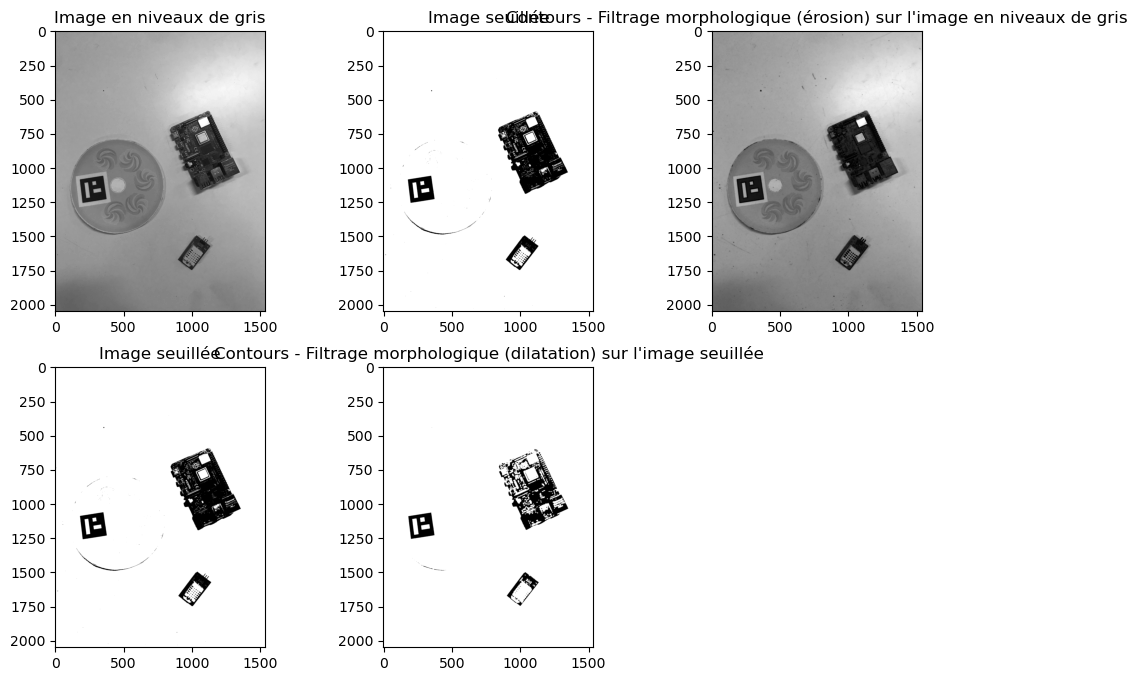

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Charger l'image en niveaux de gris
gray_image = cv2.imread("C:/Users/amirb/OneDrive/Bureau/image1.jpg", cv2.IMREAD_GRAYSCALE)

# Charger l'image binarisée
binary_image = cv2.imread("C:/Users/amirb/OneDrive/Bureau/image2.jpg", cv2.IMREAD_GRAYSCALE)

# Choisir l'élément structurant (noyau) pour les opérations morphologiques
kernel = np.ones((5, 5), np.uint8)  # Vous pouvez ajuster la taille du noyau

# Appliquer l'opération morphologique d'érosion sur l'image en niveaux de gris
erosion_gray = cv2.erode(gray_image, kernel, iterations=1)

# Appliquer l'opération morphologique de dilatation sur l'image seuillée
dilation_binary = cv2.dilate(binary_image, kernel, iterations=1)

# Afficher les résultats
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(gray_image, cmap='gray')
plt.title('Image en niveaux de gris')

plt.subplot(232)
plt.imshow(binary_image, cmap='gray')
plt.title('Image seuillée')

plt.subplot(233)
plt.imshow(erosion_gray, cmap='gray')
plt.title('Contours - Filtrage morphologique (érosion) sur l\'image en niveaux de gris')

plt.subplot(234)
plt.imshow(binary_image, cmap='gray')
plt.title('Image seuillée')

plt.subplot(235)
plt.imshow(dilation_binary, cmap='gray')
plt.title('Contours - Filtrage morphologique (dilatation) sur l\'image seuillée')

plt.show()
